In [1]:
import anndata as ad
import ACTIONet as anet

In [2]:
%load_ext autoreload
%autoreload 2
%aimport ACTIONet

In [3]:
adata = ad.read_h5ad("data/pfc5k_ACTIONet_v2_python.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 4505 × 17658
    obs: 'umis', 'genes', 'mito.perc', 'sizeFactors', 'Celltype', 'assigned_archetype', 'node_centrality'
    uns: 'ACTION', '__annotations___colors', 'metadata', 'obsm_annot', 'varm_annot'
    obsm: 'ACTION', 'ACTION_B', 'ACTION_normalized', 'ACTIONet2D', 'ACTIONet3D', 'ACTIONred', 'C_stacked', 'C_unified', 'H_stacked', 'H_unified', 'archetype_footprint', 'denovo_color'
    varm: 'ACTION_A', 'ACTION_V', 'unified_feature_profile', 'unified_feature_specificity'
    obsp: 'ACTIONet'

In [7]:
import json
import itertools

f = open('tmp/markers.json')
 
all_markers = json.load(f)

markers = all_markers["Brain"]["PFC"]["Mohammadi2020"]["marker.genes"]

In [15]:
Labels, Conf, Enrichment = anet.po.cells.annotate(adata, markers, post_correction=False)

Smoothing geneset scores ... done


In [ ]:
Label2 = anet.po.cells.correct_labels(adata=adata, initial_labels=Labels.values, return_raw=True)


In [22]:
import pandas as pd
initial_labels = Labels.values
labels = pd.Series(
    initial_labels.astype("str"), index=adata.obs.index.values.astype("str")
)
labels

AGGACTTCATCAGCTA-1          Ast
TTTGATCAGCAATAAC-1-1        Ast
GCTTCACGTCCGGTGT-1          Ast
CCTCTAGCAGCAGGAT-1-1        Ast
TTCATGTCAAGTAGTA-1-1        Ast
                         ...   
ATGGTTGAGTAGCAAT-1      Ex-NRGN
GCGGATCAGCGCATCC-1      Ex-NRGN
GGGACAAAGGTCGTCC-1      Ex-NRGN
CACGGGTCAGCCTATA-1      Ex-NRGN
GTGGAAGGTACTGACT-1-1    Ex-NRGN
Length: 4505, dtype: object

KeyError: 'Could not find key __annotations__ in .var_names or .obs.columns.'

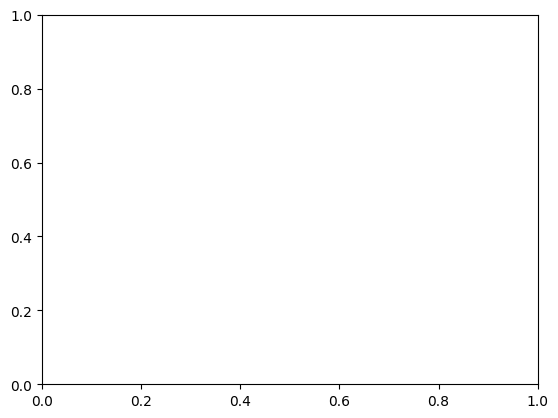

In [9]:
anet.pl.plot_ACTIONet(adata, Labels)

In [10]:
markers_Velmeshev = all_markers["Brain"]["PFC"]["Velmeshev2019"]["marker.genes"]

In [11]:
Labels_Velmeshev, Conf_Velmeshev, Enrichment_Velmeshev = anet.po.cells.annotate(adata, markers_Velmeshev)

Computing auto-correlation over network ... done
Post-smoothing expression values ... done


/Users/mohammadi/miniconda3/envs/actionet/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<AxesSubplot: title={'center': '__annotations__'}, xlabel='actionet2d1', ylabel='actionet2d2'>

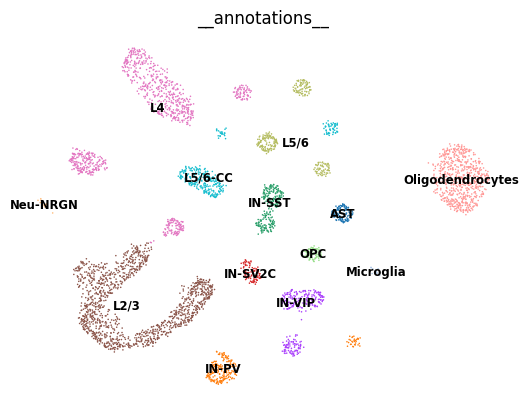

In [12]:
anet.pl.plot_ACTIONet(adata, Labels_Velmeshev)